In [2]:
from keras.datasets import mnist
from keras.models import Sequential, Model, load_model
from keras.utils import to_categorical
from keras.layers import Dense, Flatten, Input, BatchNormalization, Dropout
from keras import optimizers
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [3]:
import numpy as np
import matplotlib.pyplot as plt

### Importation de la base de données MNIST (ce sont des images de chiffres manuscrits, hello world du deep learning)

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

### Affichage des chiffres

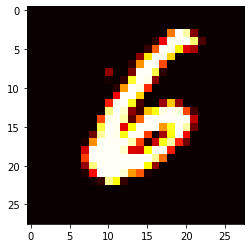

In [5]:
r = np.random.randint(x_train.shape[0])

plt.imshow(x_train[r],cmap = "hot")

### Normalisation des données

In [6]:
x_train = x_train/255

x_test = x_test/255

###  Passage des données (0,1,2,3...) en catégories. Exemple : 3 devient (0,0,0,1,0,0,0,0,0,0)

In [7]:
y_train_cat = to_categorical(y_train,num_classes = 10)

y_test_cat = to_categorical(y_test,num_classes = 10)

### Construction du réseau

In [8]:
model = Sequential()
model.add(Flatten(input_shape = (28,28))) #Passage de tableau 2D à 1D

In [9]:
model.add(Dense(128,activation = "relu", kernel_initializer = "he_normal",kernel_regularizer = regularizers.l2(0.01)))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Dense(128,activation = "relu", kernel_initializer = "he_normal",kernel_regularizer = regularizers.l2(0.01)))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Dense(10,activation = "softmax", kernel_initializer = "he_normal",kernel_regularizer = regularizers.l2(0.01)))

### Optimizer et loss function

In [10]:
opt = optimizers.SGD(lr = 0.01)

In [11]:
model.compile(loss = "binary_crossentropy",optimizer = opt, metrics = ['categorical_accuracy'])

### Affichage de l'architecture du réseau 

In [12]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               5

### Mise en place du Early Stopping

In [13]:
early_stopping = EarlyStopping(monitor = "val_loss",patience = 10,restore_best_weights=True)


### Checkpointer pour sauvegarder le meilleur modèle

In [14]:
checkpointer = ModelCheckpoint(filepath = "model_exemple_nist_best.h5",verbose = 1,save_best_only = True)

### Apprentissage

In [15]:
hist = model.fit(x_train,y_train_cat,epochs = 10,batch_size = 128,validation_split = 0.1,callbacks = [early_stopping,checkpointer])

Epoch 1/10
415/422 [============================>.] - ETA: 0s - loss: 5.1432 - categorical_accuracy: 0.4713
Epoch 00001: val_loss improved from inf to 4.63822, saving model to model_exemple_nist_best.h5
422/422 [==============================] - 3s 7ms/step - loss: 5.1354 - categorical_accuracy: 0.4749 - val_loss: 4.6382 - val_categorical_accuracy: 0.7735
Epoch 2/10
421/422 [============================>.] - ETA: 0s - loss: 4.2784 - categorical_accuracy: 0.7349
Epoch 00002: val_loss improved from 4.63822 to 3.89700, saving model to model_exemple_nist_best.h5
422/422 [==============================] - 2s 5ms/step - loss: 4.2777 - categorical_accuracy: 0.7349 - val_loss: 3.8970 - val_categorical_accuracy: 0.8632
Epoch 3/10
418/422 [============================>.] - ETA: 0s - loss: 3.6133 - categorical_accuracy: 0.8084
Epoch 00003: val_loss improved from 3.89700 to 3.29455, saving model to model_exemple_nist_best.h5
422/422 [==============================] - 2s 5ms/step - loss: 3.6106 - c

 ### Affichage de l'historique de l'apprentissage

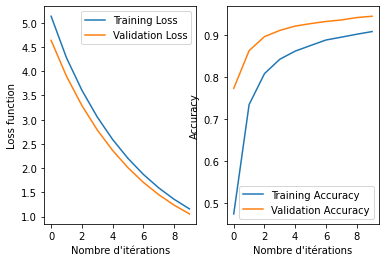

In [16]:
figure = plt.figure()

ax1 = plt.subplot(121)
ax1.plot(hist.history["loss"],label = "Training Loss")
ax1.plot(hist.history["val_loss"],label = "Validation Loss")
plt.xlabel("Nombre d'itérations")
plt.ylabel("Loss function")
plt.legend()

ax2 = plt.subplot(122)
ax2.plot(hist.history["categorical_accuracy"],label = "Training Accuracy")
ax2.plot(hist.history["val_categorical_accuracy"],label = "Validation Accuracy")
plt.xlabel("Nombre d'itérations")
plt.ylabel("Accuracy")
plt.legend()

 ### Accuracy sur la base de test

In [17]:
prediction_bar = model.predict(x_test)
prediction = np.argmax(prediction_bar,axis = 1)

print("Accuracy on test set: " + str(np.round(np.sum(prediction == y_test)/x_test.shape[0]*100,3)) + " %")

Accuracy on test set: 92.72 %


In [112]:
y_test.shape

(10000,)

### Essai sur la base de test

No handles with labels found to put in legend.
No handles with labels found to put in legend.


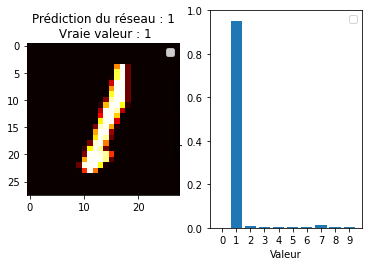

In [18]:
figure = plt.figure()

figure.clear()

r = np.random.randint(x_test.shape[0])

ax1 = plt.subplot(121)
ax1.imshow(x_test[r],cmap = "hot")
plt.title("Prédiction du réseau : " + str(prediction[r]) + "\n Vraie valeur : " + str(y_test[r]))
plt.legend()

ax2 = plt.subplot(122)
ax2.bar(np.arange(10),height = prediction_bar[r],tick_label = np.arange(10))
plt.xlabel("Valeur")
plt.ylabel("Output du réseau")
plt.legend()

 ### Exemple d'erreur

No handles with labels found to put in legend.
No handles with labels found to put in legend.


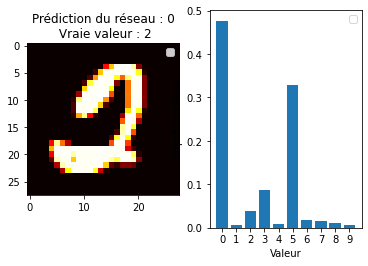

In [19]:
figure = plt.figure()

figure.clear()

erreurs = np.where(prediction != y_test)[0]

r2 = np.random.randint(erreurs.shape[0])
e = erreurs[r2]

ax1 = plt.subplot(121)
ax1.imshow(x_test[e],cmap = "hot")
plt.title("Prédiction du réseau : " + str(prediction[e]) + "\n Vraie valeur : " + str(y_test[e]))
plt.legend()

ax2 = plt.subplot(122)
ax2.bar(np.arange(10),height = prediction_bar[e],tick_label = np.arange(10))
plt.xlabel("Valeur")
plt.ylabel("Output du réseau")
plt.legend()

# TEST SUR LA RECONNAISANCE DIMAGE PERSO


In [113]:
from PIL import Image, ImageFilter

# https://stackoverflow.com/questions/35842274/convert-own-image-to-mnists-image
# https://www.pluralsight.com/guides/importing-image-data-into-numpy-arrays

def imageprepare(argv):
    """
    This function returns the pixel values.
    The imput is a png file location.
    """
    im = Image.open(argv).convert('L')
    width = float(im.size[0])
    height = float(im.size[1])
    newImage = Image.new('L', (28, 28), (255))  # creates white canvas of 28x28 pixels

    if width > height:  # check which dimension is bigger
        # Width is bigger. Width becomes 20 pixels.
        nheight = int(round((20.0 / width * height), 0))  # resize height according to ratio width
        if (nheight == 0):  # rare case but minimum is 1 pixel
            nheight = 1
            # resize and sharpen
        img = im.resize((20, nheight), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wtop = int(round(((28 - nheight) / 2), 0))  # calculate horizontal position
        newImage.paste(img, (4, wtop))  # paste resized image on white canvas
    else:
        # Height is bigger. Heigth becomes 20 pixels.
        nwidth = int(round((20.0 / height * width), 0))  # resize width according to ratio height
        if (nwidth == 0):  # rare case but minimum is 1 pixel
            nwidth = 1
            # resize and sharpen
        img = im.resize((nwidth, 20), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wleft = int(round(((28 - nwidth) / 2), 0))  # caculate vertical pozition
        newImage.paste(img, (wleft, 4))  # paste resized image on white canvas

    # newImage.save("sample.png

    tv = list(newImage.getdata())  # get pixel values

    # normalize pixels to 0 and 1. 0 is pure white, 1 is pure black.
    tva = [(255 - x) * 1.0 / 255.0 for x in tv]
    print(tva)
    return tva

In [120]:
# charger image perso 
x=imageprepare('datasets/mnist_test/test_3.png') #file path here
print(len(x))# mnist IMAGES are 28x28=784 pixels

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00392156862745098, 0.00392156862745098, 0.00392156862745098, 0.00392156862745098, 0.00392156862745098, 0.00392156862745098, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01568627450980392, 0.011764705882352941, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

(1, 28, 28)

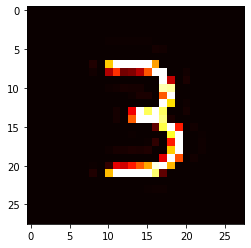

In [121]:
# TRANSFORM X [784,1] into array(1,28,28)
col = 28  # just grab the number of columns here
xtransfinal = []
xtransfinal.append([x[i:i+col] for i in range(0, len(x), col)])
xtransfinal = np.array(xtransfinal)

#VISUALIZATION
plt.imshow(xtransfinal[0],cmap = "hot")
xtransfinal.shape

In [122]:
# FEEDING INPUT TO MODEL 
predictionbaralx = model.predict(xtransfinal)
predictionalx = np.argmax(predictionbaralx,axis = 1)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


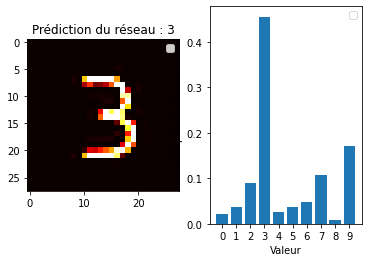

In [123]:
# RESULT VIZUALISATION
figure = plt.figure()
figure.clear()

#r = np.random.randint(x_test.shape[0])
r=0

ax1 = plt.subplot(121)
ax1.imshow(xtransfinal[r],cmap = "hot")
plt.title("Prédiction du réseau : " + str(predictionalx[r]))# + "\n Vraie valeur : " + str(y_test[r]))
plt.legend()

ax2 = plt.subplot(122)
ax2.bar(np.arange(10),height = predictionbaralx[r],tick_label = np.arange(10))
plt.xlabel("Valeur")
plt.ylabel("Output du réseau")
plt.legend()

In [111]:
#import numpy as np
#xtrans = np.array(x)
#shape = (28,28)
#xtrans.reshape(shape)
#xtrans

In [74]:
#col = 28  # just grab the number of columns here
#xtrans2 = [x[i:i+col] for i in range(0, len(x), col)]
#xtrans2 = np.array(xtrans2)
#xtrans2.shape